# Lab 4 Impedance Control

## Questions

### Question 4.1: Apply virtual forces to the robot

**What are the effects of changing the impedance parameters (M, B, K) in the impedance_params.yaml file?**

El control de impedancia busca que el robot se comporte como un sistema masa-
resorte-amortiguador deseado. Los parámetros $M$ (masa deseada), $B$
(amortiguamiento deseado) y $K$ (rigidez deseada) definen este comportamiento.

La ecuación fundamental del modelo de impedancia en el espacio cartesiano es:

$$M \ddot {\tilde{x}} + B \dot {\tilde{x}} + K {\tilde{x}} = f_{ext} \tag {4.4}$$

**Observación: Hay una errata en el enunciado porque en esta ecuación y en la siguiente aparece dos veces B en lugar de B y K**

Asumiendo que la única contribución al movimiento es la que proporciona el modelo mecánico de impedancia :

$$ \ddot x_d = M^{-1} (f_{ext} - B \dot {\tilde{x}} - K {\tilde{x}})$$

donde:
$$
- $\ddot x_d$ : es la aceleración cartesiana deseada del efector final
- $\dot {\tilde{x}}=\dot x - \dot x_d$: es el error de la velocidad cartesiana
- $\tilde{x}=x-x_d$: es el error de posición cartesiana
- $\dot x_d$: es la velocidad deseada en el punto de equilibrio (en este caso $\dot x_d=0$)
- $x_d$: es la posición deseada en el punto de equilibrio 


Analicemos el efecto de cada parámetro:

1. Matriz de masa deseada $M$
   - Aumentar $M$: Hará que el robot parezca "más masivo" o inercial. Esto
significa que resistirá más los cambios de aceleración. Ante una
fuerza externa o un error de posición/velocidad, la respuesta
(aceleración $\ddot x_d$) será más lenta y suave, ya que la inercia a vencer es
mayor.
    - Disminuir $M$: Hará que el robot se sienta "menos masivo" y responda
más rápidamente a las fuerzas o errores. La aceleración será mayor
para la misma fuerza, lo que implica una respuesta más ágil y menos
resistencia a los cambios de movimiento. Sin embargo, valores muy
pequeños pueden llevar a inestabilidades o vibraciones si el sistema
real tiene límites de velocidad/aceleración.
2. Matriz de amortiguamiento deseado $B$
   - Aumentar $B$: Aumenta la "fricción" o resistencia al movimiento
proporcional a la velocidad. El robot se sentirá más amortiguado, lo
que se traduce en una respuesta más suave y lenta a las
perturbaciones o cambios en la pose de equilibrio. Reduce la
oscilación y puede ayudar a la estabilidad.
    - Disminuir $B$: Disminuye la resistencia al movimiento. El robot se
sentirá más "libre" o menos amortiguado. Esto puede llevar a
oscilaciones o incluso inestabilidad si el valor es demasiado bajo y no
hay suficiente amortiguamiento intrínseco en el sistema.
3. Matriz de rigidez deseada $K$
   - Aumentar $K$: Hace que el robot se comporte como un resorte "más
rígido". Esto significa que el robot ejercerá una mayor fuerza de
recuperación para volver a su pose de equilibrio $\dot x_d$ cuando es
desplazado de ella. Se resistirá más a las desviaciones de la pose
deseada y buscará retornar a ella más rápidamente.
    - Disminuir $K$: Hace que el robot se comporte como un resorte "más
blando". El robot ejercerá una fuerza de recuperación menor para volver
a su pose de equilibrio. Se sentirá más complaciente ante las fuerzas
externas y permitirá mayores desviaciones antes de intentar corregirlas
con fuerza. Un valor de $K=0$ implica que el robot no tiene un punto de
equilibrio fijo, comportándose más como un seguidor de fuerza.

**What are the effects of having a "high impedance" in axis X and "low impedance" in axis Y?**

Cuando hablamos de "alta" o "baja" impedancia en un eje específico, nos referimos
principalmente a los valores de los elementos diagonales de las matrices $M$, $B$ y $K$
correspondientes a ese eje. Una alta impedancia generalmente implica valores grandes para los parámetros $M$, $B$ y $K$ en esa dirección, mientras que una baja impedancia implica valores pequeños.

Considerando el caso específico de un manipulador de 2 grados de libertad operando
en un plano (X, Y):

- "Alta impedancia" en el eje X: Esto se lograría con valores elevados para $M_{xx}$, $B_{xx}$ y $K_{xx}$ (elementos correspondientes a la dirección X en las matrices diagonales).El robot resistirá fuertemente cualquier movimiento o fuerza aplicada en la dirección X. Se sentirá "rígido" y "pesado" en esa dirección. Si se intenta mover el efector final en X, se necesitará aplicar mucha fuerza, y la respuesta será lenta y controlada. Si se desplaza de su posición de equilibrio en X, generará una gran fuerza para volver a ella.
- "Baja impedancia" en el eje Y: Esto se lograría con valores bajos (cercanos a cero) para $M_{yy}$, $B_{yy}$ y $K_{yy}$  (elementos correspondientes a la dirección Y). El robot será muy complaciente y fácil de mover en la dirección Y; se sentirá "ligero" y "flexible" en esa dirección; con una fuerza mínima en Y, el efector final se desplazará fácilmente. Si se
desplaza de su posición de equilibrio en Y, ejercerá una fuerza muy
pequeña para volver a ella, o incluso ninguna si los parámetros son
cero (comportamiento de "flotación" o seguimiento de fuerza pura).

Al combinar estas configuraciones, el robot se comportaría de manera anisotrópica:
muy rígido y difícil de mover en una dirección (X) y muy flexible y fácil de mover en la
dirección perpendicular (Y). Esto es útil en tareas donde se requiere precisión o
interacción rígida en un eje, y complacencia o seguimiento de fuerza en otro (por
ejemplo, siguiendo una superficie con poca fuerza mientras se posiciona con rigidez
lateral).

### Question 4.2: Apply virtual forces to the robot

**Does the forces applied in the X axis generate motions in the Y axis? And does the forces applied in the Y axis generate motions in the X axis?**

Sí, en un manipulador redundante o con cinemática no desacoplada (como un
RR en 2D), las fuerzas aplicadas en un eje cartesiano (X o Y) generalmente
generan movimientos en el otro eje cartesiano.

Esto se debe a un fenómeno conocido como acoplamiento cinemático y dinámico.

**Can you explain why applying forces in one axis generate motions in the other axis?**

Este acoplamiento cruzado se explica por varias razones:

1. **Acoplamiento cinemático** (matriz jacobiana no diagonal):

La matriz Jacobiana, J(q), relaciona las velocidades articulares con las velocidades cartesianas:

$$\dot x =J(q) \dot q$$

Para un manipulador RR, la Jacobiana es:

$$J(q) = \begin{bmatrix}
-l_1 \sin(q_1) -l_2 \sin(q_1 + q_2) & -l_2 \sin(q_1 + q_2)\\
 l_1 \cos(q_1) -l_2 \sin(q_1 + q_2) &  l_2 \cos(q_1 + q_2)
\end{bmatrix} \tag {2.7}$$

Como se puede observar, los elementos de esta matriz dependen de las posiciones articulares ($q1$ ,$q2$) y no es una matriz diagonal. Esto significa que cualquier cambio en unaa posición  articular ($q1$ o $q2$) afectaa a ambas componentes de la posición cartesiana ($x$ e $y$).

Cuando aplicas una fuerza en una dirección cartesiana (ej., X), el controlador de impedancia calcula las aceleraciones articulares deseadas ($\ddot q$) usando la inversa de la Jacobiana:

$$\ddot q = J(q)^{-1} [\ddot x - \dot J [q, \dot q)\dot q] \tag {4.6b}$$

Dado que $J(q)^{-1}$ generalmente no es diagonal, las aceleraciones articulares resultantes para $q1$ y $q2$ se calculan a partir de una combinación de las aceleraciones cartesianas deseadas en X e Y. Estos movimientos articulares, a su vez, se
traducen en movimientos acoplados en el espacio cartesiano.

2. **Acoplamiento dinámico** (matriz de inercia en el espacio operacional no
diagonal):

Las dinámicas del manipulador en el espacio articular están acopladas
por la matriz de inercia articular, $M(q)$. Cuando estas dinámicas se
transforman al espacio cartesiano, la matriz de inercia en el espacio
operacional también puede ser no diagonal.

Esto implica que la inercia percibida en una dirección cartesiana puede
depender de la dirección de movimiento y las configuraciones
articulares, lo que lleva a respuestas acopladas incluso si el controlador
de impedancia estuviera idealmente desacoplado en el espacio de
tarea.

3. **Configuración del robot** (pose): En ciertas configuraciones articulares (cerca de singularidades o cuando los eslabones están muy alineados), el robot puede ser más
propenso a mostrar movimientos acoplados. Por ejemplo, si el robot está casi completamente extendido, un pequeño movimiento articular puede causar un gran cambio en una dirección cartesiana y un pequeño cambio en la otra, o viceversa.

**How do you think this phenomena can be mitigated?**

Mitigar el acoplamiento cruzado en el control de impedancia es un objetivo importante
para lograr un comportamiento más intuitivo y predecible del robot. Aquí hay varias
estrategias:

1. **Diseño de la matrices de impedancia** ($M$,$B$ y , $K$):

    - Matrices Diagonales: La forma más común de intentar desacoplar el comportamiento es definir las matrices de impedancia deseada como diagonales. Esto implica que, a nivel del controlador, los parámetros de masa, amortiguamiento y rigidez en X solo afectan a X, y en Y solo afectan a Y. Por ejemplo, para una impedancia alta en X y baja en Y se definiría $K = [K_{xx} 0; 0 K_{yy}]$ con $K_{xx}$ grande y $K_{yy}$ pequeño

    - Aunque las matrices sean diagonales, el acoplamiento cinemático y dinámico inherente al manipulador real seguirá existiendo en cierta medida. El controlador intentará compensarlo, pero la perfección es difícil de alcanzar debido a las no linealidades y las incertidumbres del modelo.
  
2. **Compensación de la dinámica del manipulador** (control por torque/fuerza):

    - El esquema de control de impedancia a menudo se implementa sobre un controlador de dinámica inversa o compensación de la dinámica articular (como en el Laboratorio 3). Este "nivel inferior" del controlador intenta linealizar y desacoplar la dinámica real del robot, de modo que el controlador de impedancia "vea" un sistema más simple y desacoplado.

    - La ecuación del enunciado 4.6b es la clave. Al usar la Jacobiana y su derivada para transformar las aceleraciones cartesianas deseadas en aceleraciones articulares, se intenta compensar los efectos cinemáticos no lineales.

3. **Filtrado o suavizado de referencias**: Introducir filtros de paso bajo o generadores de trayectorias suaves para las referencias de posición $x_d$ y velocidad $\dot x_d$ puede reducir las excitaciones de alta frecuencia que podrían exacerbar los efectos de
acoplamiento.

4. **Selección de la pose** (configuración redundante): En robots redundantes (más grados de libertad de los mínimos necesarios para la tarea), se pueden utilizar los grados de libertad extra para optimizar la pose del robot y evitar configuraciones que resulten
en un acoplamiento cinemático o dinámico muy alto. Esto se logra minimizando una medida de acoplamiento en la Jacobiana o la matriz de inercia del espacio operacional.

5. **Control adaptativo o robusto**: Para lidiar con las incertidumbres del modelo o los cambios en el entorno que afectan el acoplamiento, se pueden usar técnicas de
control adaptativo o robusto que ajustan los parámetros del controlador
o son inherentemente menos sensibles a las variaciones del modelo.

6. **Desacoplamiento activo** (menos común en impedancia básica): En algunos casos más avanzados, si el modelo es suficientemente preciso, se podría intentar diseñar un controlador de impedancia que intencionalmente introduzca términos fuera de la diagonal para "cancelar" los acoplamientos intrínsecos del robot.

En el contexto de la práctica, el diseño de la matriz de impedancia como diagonal en
impedance_params.yaml y la correcta implementación de la cinemática diferencial de
segundo orden en calculate_desired_joint_accelerations son los mecanismos
principales para intentar mitigar este fenómeno. Sin embargo, en un robot real,
siempre habrá un grado de acoplamiento residual debido a las no linealidades y las
limitaciones del modelo.


### Question 4.3: Change equilibrium pose

- **Play with the simulation by publishing different desired equilibrium poses. Test the simulation to the extreme by taking the robot to difficult joint configurations. Don't worry about the robot, it's just a simulation and it won't break :)**

- **Did you find that the robot makes strange or unwanted motions, can you report them and explain why it happens?**

Sí, es muy probable que el robot realice movimientos extraños o no deseados,
especialmente cuando se le exige alcanzar poses de equilibrio que lo obligan a
acercarse o atravesar singularidades cinemáticas.

Reporte de Movimientos Extraños/No Deseados Comunes:

1. Movimientos Bruscos o Vibraciones: En lugar de un movimiento suave hacia
la pose deseada, el robot puede exhibir sacudidas repentinas, aceleraciones
muy altas o vibraciones. Esto ocurre a menudo al intentar salir de una
singularidad o al acercarse a ella.

3. Movimientos Acoplados/Impredecibles: Si el objetivo está en una dirección,
el robot puede moverse de forma inesperada en otra dirección (ej., al cambiar
solo X, también se mueve en Y) o tomar una trayectoria inesperada para
alcanzar el objetivo.


4. "Estancamiento" o Incapacidad de Alcanzar la Pose: El robot puede
parecer que se "estanca" o no puede alcanzar con precisión la pose de
equilibrio deseada, especialmente si esta se encuentra muy cerca de una
singularidad o fuera del espacio de trabajo alcanzable.

Explicación de por qué ocurren estos movimientos: Estos fenómenos se deben fundamentalmente a las singularidades cinemáticas y a las limitaciones inherentes del modelo cinemático y dinámico utilizado, así como a su implementación numérica.

1. Singularidades Cinemáticas:
   
    - Una singularidad es una configuración del robot donde la matriz Jacobiana $J(q)$ pierde su rango completo, lo que significa que su determinante se anula $|{J(q)}|=0$. En estas configuraciones, el manipulador pierde la capacidad de moverse en ciertas direcciones cartesianas, o ciertas direcciones cartesianas se vuelven inalcanzables.
      
    - En el código, cuando se calcula la aceleración articular deseada, se utiliza la inversa de la Jacobiana (ecuación 4.6b). Si el robot se acerca a una singularidad, el determinante de J(q) se aproxima a cero, y los elementos de $J(q)^{−1}$ tienden a infinito. Esto significa que pequeños errores o aceleraciones deseadas en el espacio cartesiano pueden requerir aceleraciones articulares extremadamente grandes, lo cual es físicamente irrealizable y causa los movimientos bruscos o la inestabilidad.

    -  Incluso si el determinante no es exactamente cero, un valor muy pequeño hace que el problema de la cinemática diferencial inversa sea mal condicionado, amplificando cualquier ruido o error de cálculo.
  
2. Acoplamiento Cinemático Residual:

    - Aunque el controlador de impedancia y la cancelación de dinámica intentan desacoplar el comportamiento del robot, la cinemática del manipulador RR es inherentemente no lineal. La Jacobiana y su derivada (jacobian_derivative_) dependen de las posiciones y velocidades articulares.

    - Si los términos de compensación no son perfectamente precisos debido a errores de modelado o limitaciones numéricas, puede persistir un acoplamiento residual. Esto se manifiesta como movimientos en ejes no deseados al aplicar una fuerza o un cambio de pose en un solo eje. Por ejemplo, al intentar mover el efector final solo en X, puede haber un movimiento no deseado en Y debido a cómo los motores deben coordinarse para mantener la impedancia en X.

3. Límites Físicos (aunque sea simulación):

    - Aunque el enunciado dice que el robot "no se romperá", en un robot real (y a menudo en simulaciones más detalladas), existen límites de par, velocidad y aceleración en las articulaciones. Cuando el controlador de impedancia exige movimientos más allá de estos límites (especialmente cerca de singularidades), el sistema no puede ejecutarlos, llevando a desviaciones del comportamiento deseado y a los movimientos "extraños".

Los movimientos extraños son una consecuencia de intentar controlar un sistema
intrínsecamente no lineal y con singularidades (el manipulador robótico) utilizando
modelos que, aunque avanzados, no pueden predecir o compensar perfectamente el
comportamiento en todos los rangos operativos, especialmente en puntos
problemáticos como las singularidades.



## Cartesian impedance control

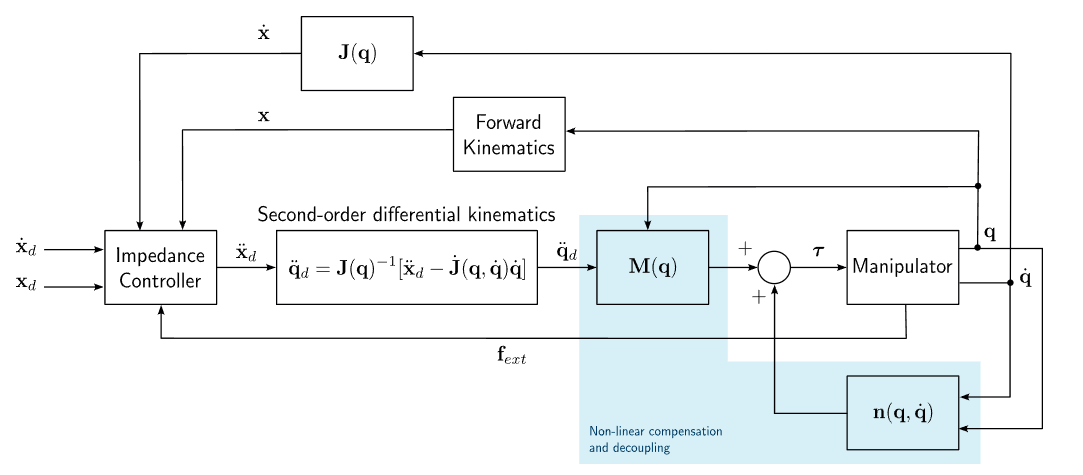

## Controller implementation

### forward_kinematics

```C++
    // Method to calculate forward kinematics
        Eigen::VectorXd forward_kinematics()
        {
            // Placeholder for forward kinematics x = [l1 * cos(q1) + l2 * cos(q1 + q2), l1 * sin(q1) + l2 * sin(q1 + q2)]
            Eigen::VectorXd x(2);
            double q1 = joint_positions_(0);
            double q2 = joint_positions_(1);

            x << l1_ * cos(q1) + l2_ * cos(q1 + q2),
                 l1_ * sin(q1) + l2_ * sin(q1 + q2);
            return x; // cartesian_pose_ = forward_kinematics()
        }
```

### update_jacobians

```C++
    // Method to update jacobian and jacobian derivative
        void update_jacobians()
        {
            // Placeholder for jacobian and jacobian_derivative matrices
            double q1 = joint_positions_(0);
            double q2 = joint_positions_(1);
            double q_dot1 = joint_velocities_(0);
            double q_dot2 = joint_velocities_(1);
            double sq1 = sin(q1);
            double cq1 = cos(q1);
            double s12 = sin(q1+q2);
            double c12 = cos(q1+q2);

            // Calculate J(q)
            jacobian_ << -l1*s1-l2*s12, -l2*s12,
                          l1*c1+l2*c12,  l2*c12;

            // Calculate J'(q,q')
            jacobian_derivative_ << -l1*c1*q_dot1-l2*c12*q_dot1, -l2*c12*q_dot2,
                                    -l1*s1*q_dot1-l2*s12*q_dot1, -l2*s12*q_dot2;

            RCLCPP_INFO(this->get_logger(), "Jacobian:\n[%.3f, %.3f]\n[%.3f, %.3f]",
                        jacobian_(0, 0), jacobian_(0, 1),
                        jacobian_(1, 0), jacobian_(1, 1));

            double det = jacobian_.determinant();
            RCLCPP_INFO(this->get_logger(), "Jacobian determinant: %.6f", det);            
        } // update_jacobians();
```

### diferential_kinematics

```C++
    // Method to calculate Cartesian velocity with the first-order differential kinematics
        Eigen::MatrixXd differential_kinematics()
        {
            // Placeholder for first-order differential kinematics
            Eigen::VectorXd x_dot(2);
            x_dot << jacobian_ * joint_velocities_;

            return x_dot;
        } // cartesian_velocities_ = differential_kinematics();

```

### impedance_controller

```C++
    // Method to compute the impedance controller
        Eigen::VectorXd impedance_controller()
        {
            // Placeholder for impedance controller calculation
            Eigen::VectorXd x_dot_d = Eigen::VectorXd::Zero(2); // We assume desired cartesian velocity = 0

            // Calculate Cartesian errors
            Eigen::VectorXd x_error = Eigen::VectorXd::Zero(2); // << 0,0;
            Eigen::VectorXd x_dot_error = Eigen::VectorXd::Zero(2); //<< 0,0;
            x_error = cartesian_pose_ - equilibrium_pose_;
            x_dot_error = cartesian_velocities_ - x_dot_d;

            // Replace with actual impedance controller equation: x'' = M^(-1)[F_ext - k x_error - B x'_error]
            // M     = mass_matrix_ 
            // k     = stiffness_matrix_ 
            // B     = damping_matrix_ 
            // F_ext = external_wrenches_
            Eigen::VectorXd x_ddot(2);
            x_ddot << mass_matrix_.inverse() * (external_wrenches_ - stiffness_matrix_ * x_error - damping_matrix_ * x_dot_error);

            return x_ddot;
        } // desired_cartesian_accelerations_ = impedance_controller();
```

### calculate_desired_joint_accelerations

```C++
    // Method to calculate joint acceleration with the inverse of second-order differential kinematics
        Eigen::VectorXd calculate_desired_joint_accelerations()
        {
            // Placeholder for the second-order differential kinematics
            // q'' = J(q)^(-1)[x'' - J'(q,q')q']

            RCLCPP_INFO(this->get_logger(), "x_ddot: [%.3f, %.3f]",
                        desired_cartesian_accelerations_(0), desired_cartesian_accelerations_(1));
            //Eigen::VectorXd x_dot(2); //!!
            Eigen::VectorXd q_ddot(2); //!!
            q_ddot = jacobian_.inverse() * 
                    (desired_cartesian_accelerations_-jacobian_derivative_ * joint_velocities_);

            return q_ddot;
        } // desired_joint_accelerations_ = calculate_desired_joint_accelerations(); ```

## Experiment 1: Apply virtual forces to the robot

[![https://youtu.be/_fM4aoJGwO8](https://img.youtube.com/vi/_fM4aoJGwO8/0.jpg)](https://youtu.be/_fM4aoJGwO8)


## Experiment 2: Change the equilibrium pose
[![https://youtu.be/eJr2X7-662k/0.jpg](https://img.youtube.com/vi/eJr2X7-662k/0.jpg)](https://youtu.be/eJr2X7-662k)


